<a href="https://colab.research.google.com/github/Ale0945/Desafio_TelecomX/blob/main/Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extracci√≥n

In [4]:
from google.colab import files
uploaded = files.upload()

Saving TelecomX_Data.json to TelecomX_Data (1).json


In [5]:
import json

with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

In [7]:
cols_to_expand = ['customer', 'phone', 'internet', 'account']

for col in cols_to_expand:

    expanded = pd.json_normalize(df[col])

    expanded = expanded.add_prefix(f'{col}_')

    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [8]:
df.shape

(7267, 21)

In [9]:
df.dtypes

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object

In [10]:
df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

In [11]:
df.describe()

customer_SeniorCitizen  customer_tenure  account_Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000                18.250000
25%                  0.000000         9.000000                35.425000
50%                  0.000000        29.000000                70.300000
75%                  0.000000        55.000000                89.875000
max                  1.000000        72.000000               118.750000

In [12]:
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

In [13]:
df['account_Charges.Total'].dtypes

dtype('float64')

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(col, "‚Üí", df[col].unique()[:10])

customerID ‚Üí ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn ‚Üí ['No' 'Yes' '']
customer_gender ‚Üí ['Female' 'Male']
customer_Partner ‚Üí ['Yes' 'No']
customer_Dependents ‚Üí ['Yes' 'No']
phone_PhoneService ‚Üí ['Yes' 'No']
phone_MultipleLines ‚Üí ['No' 'Yes' 'No phone service']
internet_InternetService ‚Üí ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity ‚Üí ['No' 'Yes' 'No internet service']
internet_OnlineBackup ‚Üí ['Yes' 'No' 'No internet service']
internet_DeviceProtection ‚Üí ['No' 'Yes' 'No internet service']
internet_TechSupport ‚Üí ['Yes' 'No' 'No internet service']
internet_StreamingTV ‚Üí ['Yes' 'No' 'No internet service']
internet_StreamingMovies ‚Üí ['No' 'Yes' 'No internet service']
account_Contract ‚Üí ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling ‚Üí ['Yes' 'No']
account_PaymentMethod ‚Üí ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Ban

In [15]:
df['Churn'] = df['Churn'].replace('', 'No')

In [16]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.duplicated().sum()

np.int64(0)

#üìä Carga y an√°lisis

In [18]:
df['Cuentas_Diarias'] = df['account_Charges.Total'] / 30

In [19]:
df[['account_Charges.Total', 'Cuentas_Diarias']].head()

account_Charges.Total  Cuentas_Diarias
0                 593.30        19.776667
1                 542.40        18.080000
2                 280.85         9.361667
3                1237.85        41.261667
4                 267.40         8.913333

In [20]:
conteo_churn = df['Churn'].value_counts()
conteo_churn

Churn
No     5398
Yes    1869
Name: count, dtype: int64

In [21]:
porcentaje_churn = (df['Churn'].value_counts(normalize=True) * 100).round(2)
porcentaje_churn

Churn
No     74.28
Yes    25.72
Name: proportion, dtype: float64

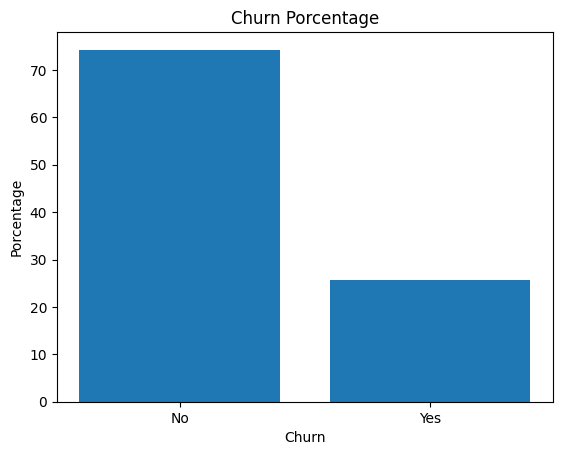

In [22]:
import matplotlib.pyplot as plt

plt.bar(porcentaje_churn.index, porcentaje_churn.values)
plt.xlabel('Churn')
plt.ylabel('Porcentage')
plt.title('Churn Porcentage')
plt.show()

In [37]:
plt.savefig("figure/Churn Porcentage.png")

<Figure size 640x480 with 0 Axes>

In [23]:
promedio_gasto = df.groupby('Churn')['account_Charges.Total'].mean().round(2)

promedio_gasto

Churn
No     2540.44
Yes    1531.80
Name: account_Charges.Total, dtype: float64

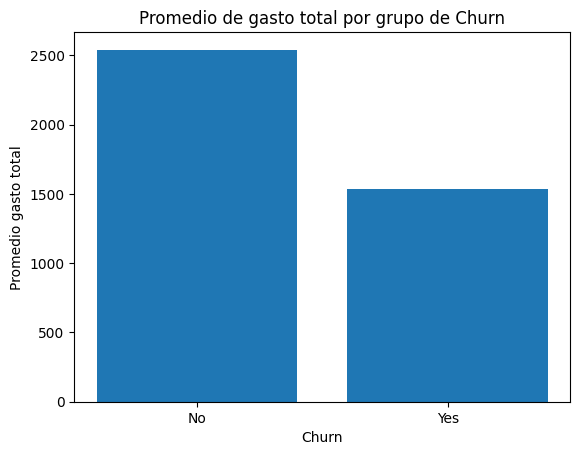

In [24]:
plt.bar(promedio_gasto.index, promedio_gasto.values)
plt.xlabel('Churn')
plt.ylabel('Promedio gasto total')
plt.title('Promedio de gasto total por grupo de Churn')
plt.show()

In [38]:
plt.savefig("figure/Promedio de gasto total por grupo de Churn.png")

<Figure size 640x480 with 0 Axes>

In [25]:
promedio_mensual = df.groupby('Churn')['account_Charges.Monthly'].mean().round(2)

promedio_mensual

Churn
No     61.35
Yes    74.44
Name: account_Charges.Monthly, dtype: float64

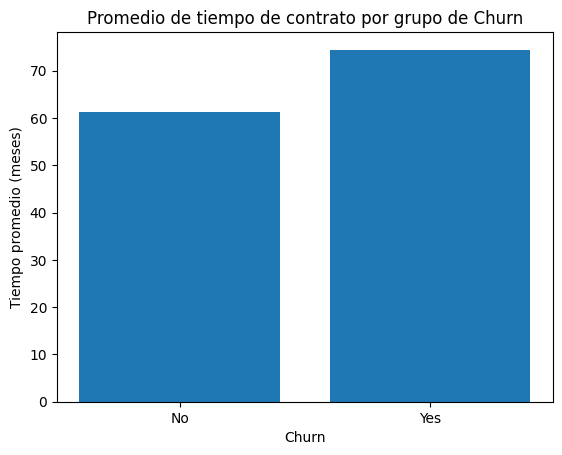

In [26]:
plt.bar(promedio_mensual.index, promedio_mensual.values)
plt.xlabel('Churn')
plt.ylabel('Tiempo promedio (meses)')
plt.title('Promedio de tiempo de contrato por grupo de Churn')
plt.show()

In [39]:
plt.savefig("figure/Promedio de tiempo de contrato por grupo de Churn.png")

<Figure size 640x480 with 0 Axes>

In [27]:
churn_by_gender = (
    df.groupby("customer_gender")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

print("Tasa de evasi√≥n por g√©nero (%)")
print(churn_by_gender)

Tasa de evasi√≥n por g√©nero (%)
Churn               No    Yes
customer_gender              
Female           73.86  26.14
Male             74.69  25.31


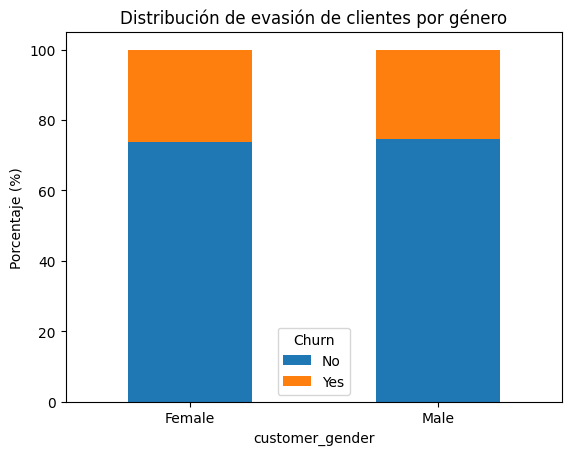

In [28]:
ig, ax = plt.subplots()
churn_by_gender.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribuci√≥n de evasi√≥n de clientes por g√©nero")
ax.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

In [40]:
plt.savefig("figure/Distribuci√≥n de evasi√≥n de clientes por g√©nero.png")

<Figure size 640x480 with 0 Axes>

In [29]:
churn_by_contract = (
    df.groupby("account_Contract")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)
print("Tasa de evasi√≥n por tipo de contrato (%)")
print(churn_by_contract)

Tasa de evasi√≥n por tipo de contrato (%)
Churn                No    Yes
account_Contract              
Month-to-month    58.68  41.32
One year          89.07  10.93
Two year          97.25   2.75


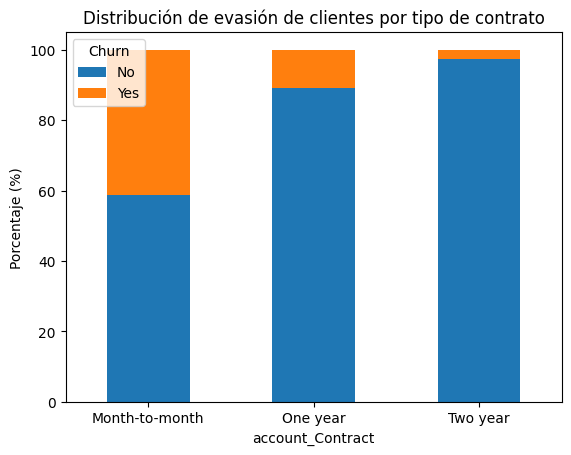

In [30]:
fig, ax = plt.subplots()
churn_by_contract.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribuci√≥n de evasi√≥n de clientes por tipo de contrato")
ax.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

In [41]:
plt.savefig("figure/Distribuci√≥n de evasi√≥n de clientes por tipo de contrato.png")

<Figure size 640x480 with 0 Axes>

In [31]:
churn_by_payment = (
    df.groupby("account_PaymentMethod")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)
print("Tasa de evasi√≥n por m√©todo de pago (%)")
print(churn_by_payment)

Tasa de evasi√≥n por m√©todo de pago (%)
Churn                         No    Yes
account_PaymentMethod                  
Bank transfer (automatic)  83.76  16.24
Credit card (automatic)    85.20  14.80
Electronic check           56.20  43.80
Mailed check               81.50  18.50


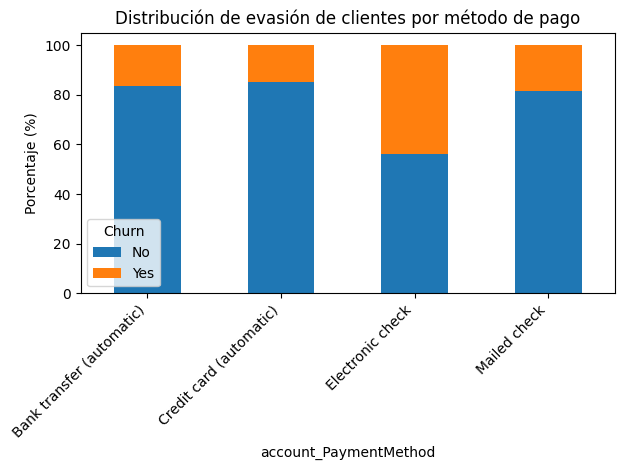

In [32]:
fig, ax = plt.subplots()
churn_by_payment.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribuci√≥n de evasi√≥n de clientes por m√©todo de pago")
ax.legend(title="Churn")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [42]:
plt.savefig("figure/Distribuci√≥n de evasi√≥n de clientes por m√©todo de pago.png")

<Figure size 640x480 with 0 Axes>

In [33]:
df["Churn_num"] = df["Churn"].map({"No": 0, "Yes": 1})
churn_mean = df["Churn_num"].mean() * 100

print(f"Tasa global de Churn: {churn_mean:.2f}%")

Tasa global de Churn: 25.72%


In [34]:
churn_median = df["Churn_num"].median()

print(f"Mediana de Churn: {churn_median}")

Mediana de Churn: 0.0


In [35]:
churn_std = df["Churn_num"].std()

print(f"Desviaci√≥n est√°ndar de Churn: {churn_std:.4f}")

Desviaci√≥n est√°ndar de Churn: 0.4371


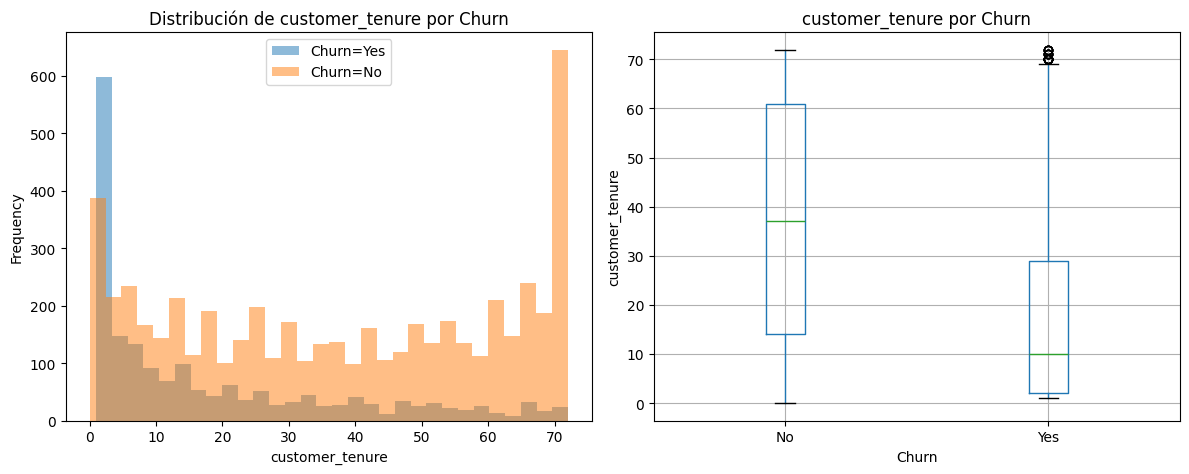

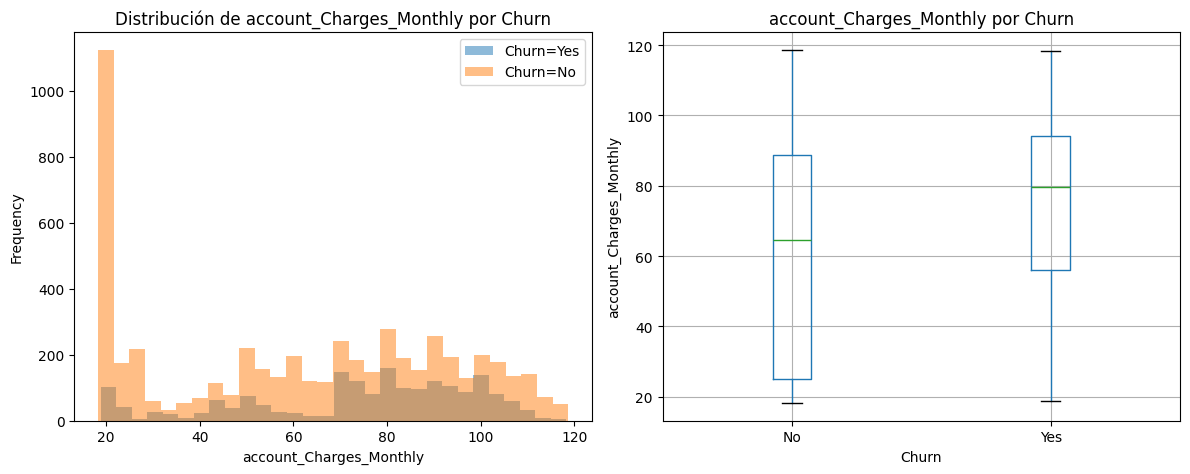

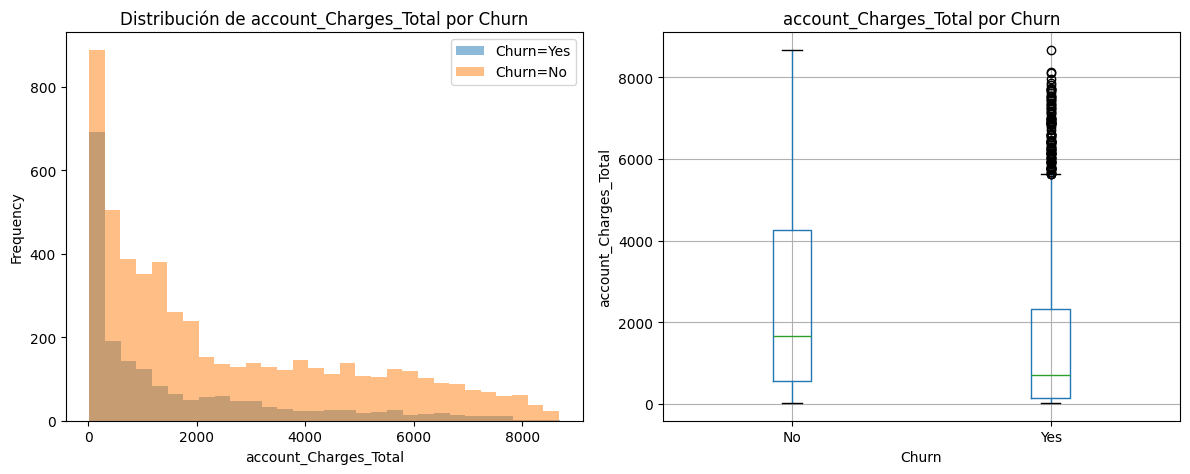

In [36]:
df.columns = [col.replace(".", "_") for col in df.columns]
numeric_vars = ["customer_tenure", "account_Charges_Monthly", "account_Charges_Total"]

for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    df[df["Churn"]=="Yes"][var].plot(kind="hist", bins=30, alpha=0.5, ax=axes[0], label="Churn=Yes")
    df[df["Churn"]=="No"][var].plot(kind="hist", bins=30, alpha=0.5, ax=axes[0], label="Churn=No")
    axes[0].set_title(f"Distribuci√≥n de {var} por Churn")
    axes[0].set_xlabel(var)
    axes[0].legend()

    df.boxplot(column=var, by="Churn", ax=axes[1])
    axes[1].set_title(f"{var} por Churn")
    axes[1].set_ylabel(var)

    plt.suptitle("")
    plt.tight_layout()
    plt.show()

In [43]:
plt.savefig("figure/Distribuci√≥n de var por Churn.png")

<Figure size 640x480 with 0 Axes>

#üìÑInforme final

An√°lisis de Evasi√≥n de Clientes (Churn)
  Introducci√≥n

El objetivo de este an√°lisis fue comprender los factores que influyen en la evasi√≥n de clientes (Churn) en TelecomX.
La evasi√≥n representa la p√©rdida de clientes que deciden cancelar el servicio, un problema cr√≠tico en la industria de telecomunicaciones debido a la alta competencia.

Identificar patrones de comportamiento en los clientes que abandonan permitir√° dise√±ar estrategias efectivas de retenci√≥n, optimizando la fidelizaci√≥n y reduciendo p√©rdidas financieras.

 Limpieza y Tratamiento de Datos

Durante la etapa de preparaci√≥n:

Se importaron los datos desde un archivo en formato JSON y se normalizaron a un DataFrame.

Se estandarizaron los nombres de las columnas, reemplazando . por _ para facilitar su uso en Python.

Se convirtieron a valores num√©ricos las variables continuas relevantes:

customer_tenure (tiempo de contrato en meses).

account_Charges_Monthly (cargo mensual).

account_Charges_Total (cargo total acumulado).

Se cre√≥ una variable binaria Churn_num (No=0, Yes=1) para poder calcular estad√≠sticas.

 An√°lisis Exploratorio de Datos
1. Tasa Global de Churn

Se encontr√≥ que la tasa global de evasi√≥n es aproximadamente 25.72% (seg√∫n la media de Churn_num).

El gr√°fico de barras mostr√≥ que la mayor√≠a de los clientes permanecen, aunque existe un grupo importante que cancela.

üìä Gr√°fico: Conteo de clientes por estado de Churn

2. Churn por variables categ√≥ricas

G√©nero: No se observaron diferencias significativas; hombres y mujeres presentan tasas similares de cancelaci√≥n (~25‚Äì26%).

Tipo de contrato: Los contratos mensuales concentran la mayor tasa de evasi√≥n, en comparaci√≥n con contratos anuales o de dos a√±os.

M√©todo de pago: Algunos m√©todos presentan mayor churn, particularmente manuales o con fricci√≥n en la experiencia de pago.

üìä Gr√°ficos: Distribuci√≥n de churn por g√©nero, contrato y m√©todo de pago

3. Variables num√©ricas por Churn

Tiempo de contrato (tenure): Los clientes con menos meses de antig√ºedad presentan una probabilidad m√°s alta de cancelar, evidenciado en los boxplots.

Cargos mensuales (MonthlyCharges): Los clientes con cargos mensuales m√°s elevados muestran mayor tendencia a churn.

Cargos totales (TotalCharges): Clientes que acumulan un gasto bajo total suelen ser los que cancelan m√°s r√°pido (por tener poco tiempo en la compa√±√≠a).

üìä Gr√°ficos: Histogramas y boxplots de tenure, cargos mensuales y cargos totales, segmentados por churn

 Conclusiones e Insights

La tasa global de churn se encuentra en un nivel significativo, lo que indica que la evasi√≥n es un problema relevante.

Los contratos mensuales son el grupo con mayor riesgo de cancelaci√≥n.

Los clientes con poco tiempo de antig√ºedad (tenure bajo) son m√°s propensos a irse.

Existen diferencias en los m√©todos de pago, lo que sugiere que la experiencia de cobro influye en la retenci√≥n.

El nivel de gasto mensual tambi√©n es un factor a considerar: los clientes con cargos m√°s altos tienen mayor probabilidad de cancelar.

 Recomendaciones

Retenci√≥n temprana: Implementar programas de bienvenida y fidelizaci√≥n en los primeros meses de contrato (bonos, descuentos, beneficios extra).

Migraci√≥n de contratos: Incentivar a los clientes de contrato mensual a pasar a contratos de mayor duraci√≥n mediante descuentos o servicios adicionales.

Optimizaci√≥n de pagos: Promover m√©todos de pago autom√°ticos y mejorar la experiencia en m√©todos con alta tasa de cancelaci√≥n.

Segmentaci√≥n de clientes en riesgo: Desarrollar un modelo predictivo de churn para identificar clientes con alto riesgo y aplicar estrategias personalizadas.

Revisi√≥n de precios y beneficios: Para clientes con cargos mensuales altos, ofrecer paquetes m√°s flexibles o promociones que mejoren la percepci√≥n de valor.